In [14]:
from prophet import Prophet
import pandas as pd

In [15]:
d=pd.read_excel(r"C:\Users\prernagupta\Desktop\aline-dress.xlsx")


In [16]:
d

,TREND,START_DATE,FSI
0,A-Line Dress Uk,2016-01-04,0.02467
1,A-Line Dress Uk,2016-01-11,0.02467
2,A-Line Dress Uk,2016-01-18,0.02524
3,A-Line Dress Uk,2016-01-25,0.02622
4,A-Line Dress Uk,2016-02-01,0.02656
...,...,...,...
282,A-Line Dress Uk,2021-05-31,0.04649
283,A-Line Dress Uk,2021-06-07,0.04550
284,A-Line Dress Uk,2021-06-14,0.04824
285,A-Line Dress Uk,2021-06-21,0.04751


In [17]:
d=d.iloc[:, [1,2]]

In [18]:
df=d.dropna()
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [19]:
df

,ds,y
0,2016-01-04,0.02467
1,2016-01-11,0.02467
2,2016-01-18,0.02524
3,2016-01-25,0.02622
4,2016-02-01,0.02656
...,...,...
282,2021-05-31,0.04649
283,2021-06-07,0.04550
284,2021-06-14,0.04824
285,2021-06-21,0.04751


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


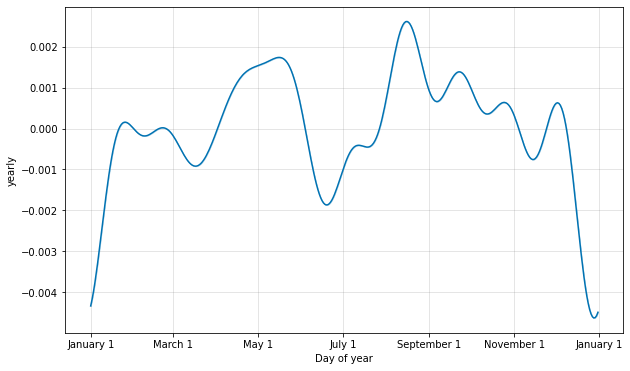

In [20]:
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


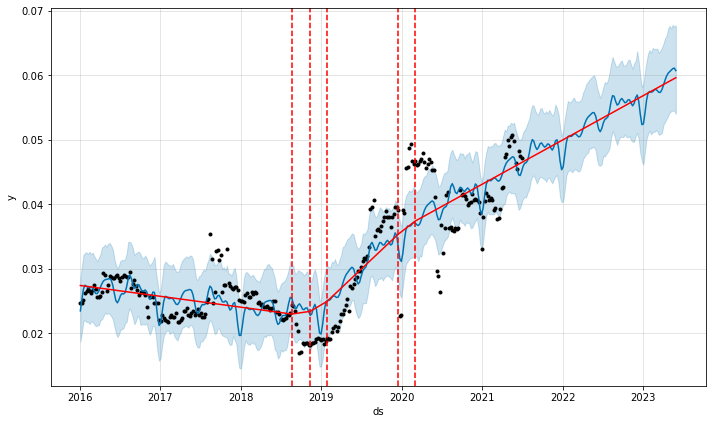

In [21]:
from prophet.plot import add_changepoints_to_plot
m = Prophet(yearly_seasonality=True, changepoint_range=1.0)
# define the model
# fit the model
m.fit(df)
future = m.make_future_dataframe(periods=100, freq='W')
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


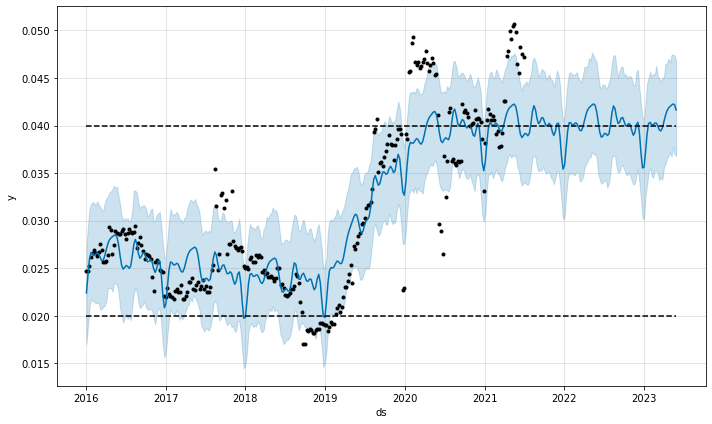

In [31]:
#logitsic, caps floors 
df['cap'] = 0.04
df['floor'] = 0.02
m = Prophet(yearly_seasonality=True, changepoint_range=1.0  ,changepoint_prior_scale=0.5, growth='logistic')

m.fit(df)
q=m.predict(df)
future = m.make_future_dataframe(periods=100, freq='W')
future['cap'] = 0.04
future['floor'] = 0.02
fcst = m.predict(future)
fig = m.plot(fcst)

In [32]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 6 forecasts with cutoffs between 2018-01-10 00:00:00 and 2020-06-28 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

In [33]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,0.000035,0.005900,0.004441,0.133706,0.089929,0.143510,0.516129
1,37 days,0.000035,0.005890,0.004385,0.132262,0.089929,0.142107,0.516129
2,39 days,0.000042,0.006444,0.004824,0.142607,0.094439,0.155135,0.483871
3,40 days,0.000039,0.006242,0.004577,0.134963,0.089929,0.145891,0.516129
4,41 days,0.000045,0.006680,0.004973,0.142342,0.094439,0.154649,0.483871


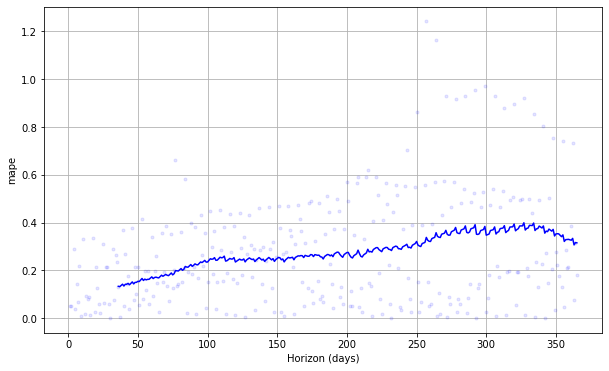

In [34]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')